In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [3]:
df = pd.read_csv("accuracy_meditation_scores.csv")
df

,Unnamed: 0,Participant,No Music,Heavy Metal,Classical,Task,Avg Meditation: NM,Avg Meditation: HM,Avg Meditation: C
0,0,Manny,0.5,0.6,0.9,Word,55.190270,58.855362,49.511575
1,1,Kassie,0.7,0.2,0.5,Word,40.222763,55.999845,50.177135
2,2,Raunit,0.7,0.8,1.0,Word,57.587489,50.041351,43.982410
3,3,Alina,0.7,0.8,0.8,Word,43.444136,10.337754,57.842287
4,4,Blake,0.7,0.9,0.8,Image,54.642820,40.494343,57.097452
5,5,Andrea,1.0,0.3,0.9,Image,34.799181,50.200114,29.639925
6,6,Rachel,1.0,1.0,1.0,Image,65.003342,43.341762,39.807707
7,7,George,0.9,0.7,0.3,Image,58.578216,37.402882,54.286211


# Accuracy Results

In [4]:
# creating arrays for each music genre
NM_acc_arr = df['No Music'].values
HM_acc_arr = df['Heavy Metal'].values
C_acc_arr = df['Classical'].values

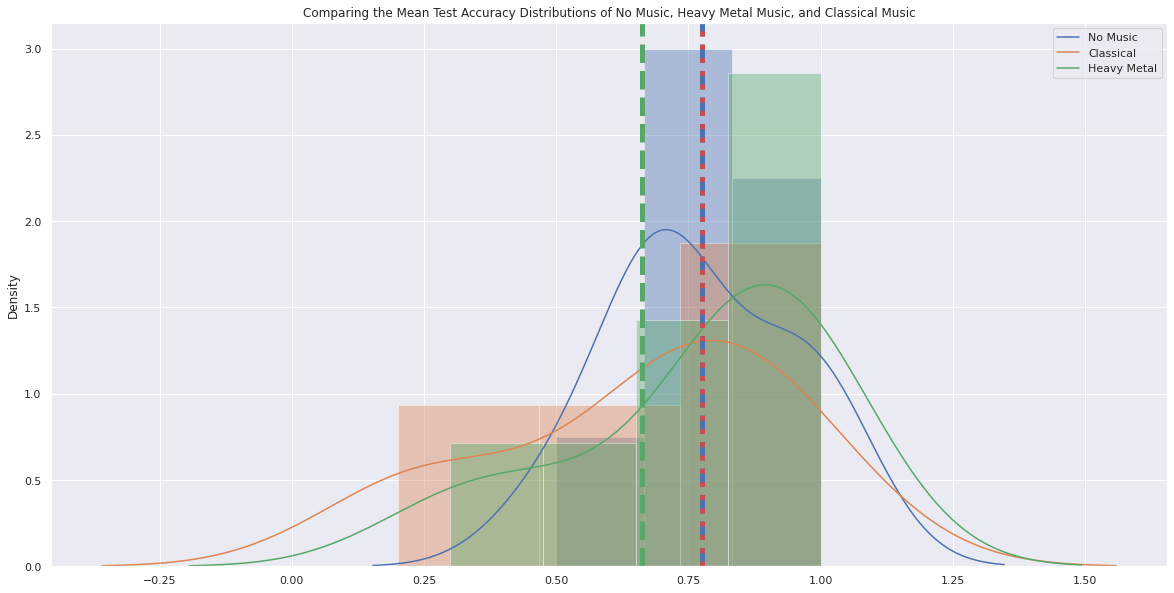

In [5]:
# plotting the distributions
plt.figure()
ax1 = sns.distplot(NM_acc_arr)
ax2 = sns.distplot(HM_acc_arr)
ax3 = sns.distplot(C_acc_arr)
plt.axvline(np.mean(NM_acc_arr), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(HM_acc_arr), color='g', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(C_acc_arr), color='r', linestyle='dotted', linewidth=5)
plt.title("Comparing the Mean Test Accuracy Distributions of No Music, Heavy Metal Music, and Classical Music")
plt.legend(["No Music", "Classical", "Heavy Metal"])

In [6]:
def compare_groups(arr1, arr2, alpha, sample_size):
    stat, p = ttest_ind(arr1, arr2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [7]:
# comparing mean distribution of no music and the mean distribution of classical music
sample_size = 8
NM_acc_sampled = np.random.choice(NM_acc_arr, sample_size)
C_acc_sampled = np.random.choice(C_acc_arr, sample_size)
compare_groups(NM_acc_sampled, C_acc_sampled, 0.05, sample_size)

Statistics=-0.401, p=0.694
Same distributions (fail to reject H0)


In [8]:
# comparing mean distribution of heavy metal music and the mean distribution of classical music
sample_size = 8
HM_acc_sampled = np.random.choice(HM_acc_arr, sample_size)
C_acc_sampled = np.random.choice(C_acc_arr, sample_size)
compare_groups(HM_acc_sampled, C_acc_sampled, 0.05, sample_size)

Statistics=-2.951, p=0.011
Different distributions (reject H0)


In [9]:
# comparing mean distribution of no music and the mean distribution of heavy metal music
sample_size = 8
NM_acc_sampled = np.random.choice(NM_acc_arr, sample_size)
HM_acc_sampled = np.random.choice(HM_acc_arr, sample_size)
compare_groups(NM_acc_sampled, HM_acc_sampled, 0.05, sample_size)

Statistics=1.655, p=0.120
Same distributions (fail to reject H0)


In [10]:
# created an array for word accuracy results
dfWords_acc = df.loc[0:3,['No Music','Heavy Metal','Classical']]
NM_words_acc_arr = dfWords_acc['No Music'].values
HM_words_acc_arr = dfWords_acc['Heavy Metal'].values
C_words_acc_arr = dfWords_acc['Classical'].values
words_acc_arr = np.append(NM_words_acc_arr, HM_words_acc_arr)
words_acc_arr = np.append(words_acc_arr, C_words_acc_arr)
words_acc_arr

array([0.5, 0.7, 0.7, 0.7, 0.6, 0.2, 0.8, 0.8, 0.9, 0.5, 1. , 0.8])

In [11]:
# created an array for image accuracy results
dfImages_acc = df.loc[4:7,['No Music','Heavy Metal','Classical']]
NM_images_acc_arr = dfImages_acc['No Music'].values
HM_images_acc_arr = dfImages_acc['Heavy Metal'].values
C_images_acc_arr = dfImages_acc['Classical'].values
images_acc_arr = np.append(NM_images_acc_arr, HM_images_acc_arr)
images_acc_arr = np.append(images_acc_arr, C_images_acc_arr)
images_acc_arr

array([0.7, 1. , 1. , 0.9, 0.9, 0.3, 1. , 0.7, 0.8, 0.9, 1. , 0.3])

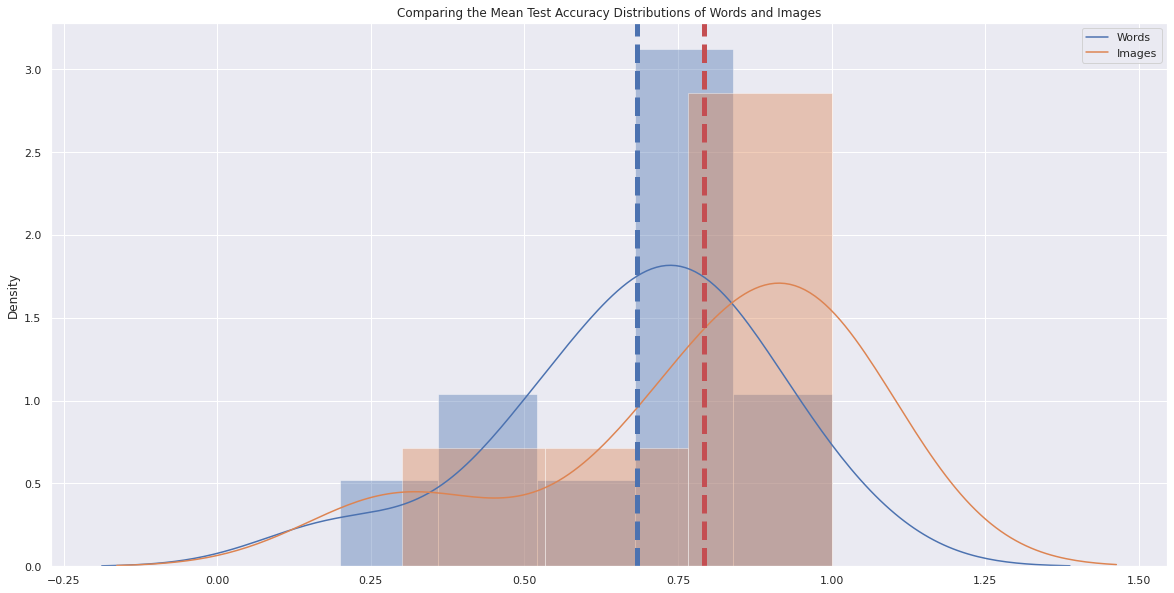

In [12]:
# plotting the distributions
plt.figure()
ax1 = sns.distplot(words_acc_arr)
ax2 = sns.distplot(images_acc_arr)
plt.axvline(np.mean(words_acc_arr), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(images_acc_arr), color='r', linestyle='dashed', linewidth=5)
plt.title("Comparing the Mean Test Accuracy Distributions of Words and Images")
plt.legend(["Words", "Images"])

In [13]:
# comparing mean distribution of accuracy for words and that of images
sample_size = 12
words_acc_sampled = np.random.choice(words_acc_arr, sample_size)
images_acc_sampled = np.random.choice(images_acc_arr, sample_size)
compare_groups(words_acc_sampled, images_acc_sampled, 0.05, sample_size)

Statistics=0.233, p=0.818
Same distributions (fail to reject H0)


# Meditation Scores

In [14]:
# creating arrays for each music genre
NM_med_arr = df['Avg Meditation: NM'].values
HM_med_arr = df['Avg Meditation: HM'].values
C_med_arr = df['Avg Meditation: C'].values

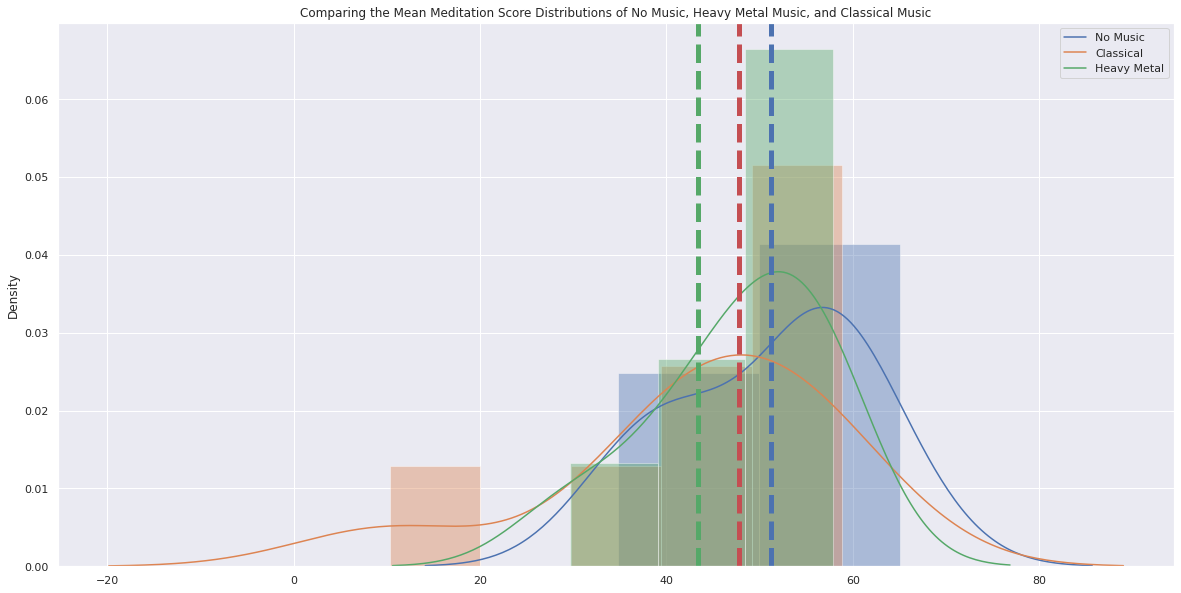

In [15]:
# plotting the distributions
plt.figure()
ax1 = sns.distplot(NM_med_arr)
ax2 = sns.distplot(HM_med_arr)
ax3 = sns.distplot(C_med_arr)
plt.axvline(np.mean(NM_med_arr), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(HM_med_arr), color='g', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(C_med_arr), color='r', linestyle='dashed', linewidth=5)
plt.title("Comparing the Mean Meditation Score Distributions of No Music, Heavy Metal Music, and Classical Music")
plt.legend(["No Music", "Classical", "Heavy Metal"])

In [16]:
# comparing mean distribution of no music and the mean distribution of classical music
sample_size = 8
NM_med_sampled = np.random.choice(NM_med_arr, sample_size)
C_med_sampled = np.random.choice(C_med_arr, sample_size)
compare_groups(NM_med_sampled, C_med_sampled, 0.05, sample_size)

Statistics=3.334, p=0.005
Different distributions (reject H0)


In [17]:
# comparing mean distribution of heavy metal music and the mean distribution of classical music
sample_size = 8
HM_med_sampled = np.random.choice(HM_med_arr, sample_size)
C_med_sampled = np.random.choice(C_med_arr, sample_size)
compare_groups(HM_med_sampled, C_med_sampled, 0.05, sample_size)

Statistics=-0.894, p=0.387
Same distributions (fail to reject H0)


In [18]:
# comparing mean distribution of no music and the mean distribution of heavy metal music
sample_size = 8
NM_med_sampled = np.random.choice(NM_med_arr, sample_size)
HM_med_sampled = np.random.choice(HM_med_arr, sample_size)
compare_groups(NM_med_sampled, HM_med_sampled, 0.05, sample_size)

Statistics=4.270, p=0.001
Different distributions (reject H0)


In [19]:
# created an array for word meditation scores
dfWords_med = df.loc[0:3,['Avg Meditation: NM','Avg Meditation: HM','Avg Meditation: C']]
NM_words_med_arr = dfWords_med['Avg Meditation: NM'].values
HM_words_med_arr = dfWords_med['Avg Meditation: HM'].values
C_words_med_arr = dfWords_med['Avg Meditation: C'].values
words_med_arr = np.append(NM_words_med_arr, HM_words_med_arr)
words_med_arr = np.append(words_med_arr, C_words_med_arr)
words_med_arr

array([55.19027013, 40.22276335, 57.58748851, 43.44413632, 58.8553616 ,
       55.9998453 , 50.04135079, 10.3377542 , 49.51157494, 50.17713512,
       43.98240959, 57.84228703])

In [20]:
# created an array for word meditation scores
dfImages_med = df.loc[4:7,['Avg Meditation: NM','Avg Meditation: HM','Avg Meditation: C']]
NM_images_med_arr = dfImages_med['Avg Meditation: NM'].values
HM_images_med_arr = dfImages_med['Avg Meditation: HM'].values
C_images_med_arr = dfImages_med['Avg Meditation: C'].values
images_med_arr = np.append(NM_images_med_arr, HM_images_med_arr)
images_med_arr = np.append(images_med_arr, C_images_med_arr)
images_med_arr

array([54.64281994, 34.7991808 , 65.00334169, 58.57821553, 40.49434289,
       50.20011417, 43.34176155, 37.40288239, 57.0974524 , 29.63992537,
       39.80770673, 54.28621089])

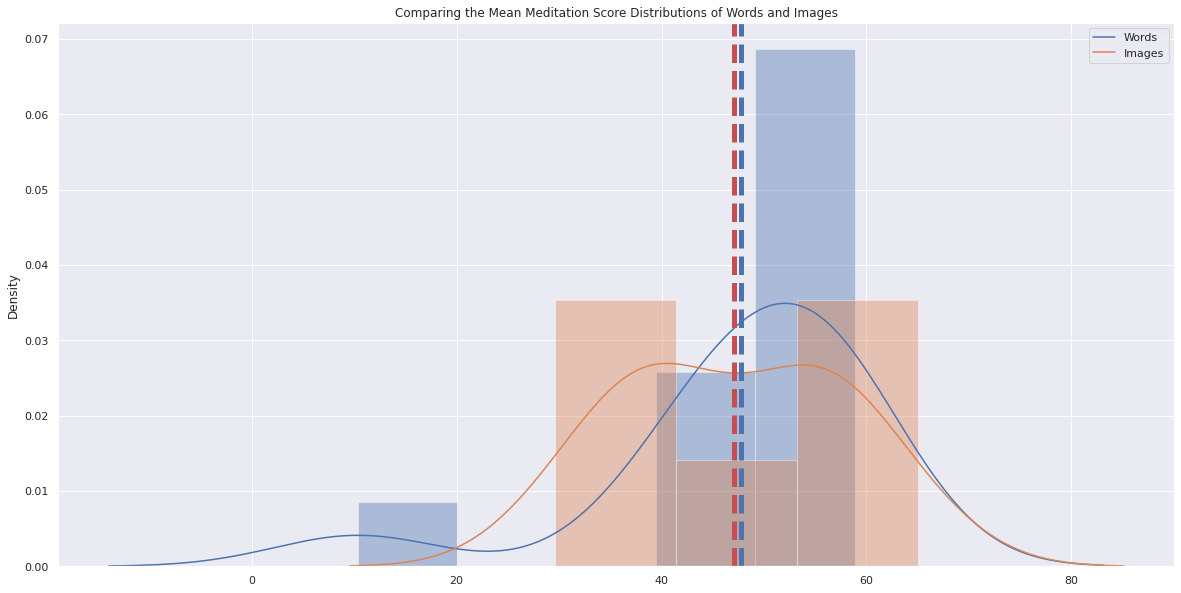

In [21]:
# plotting the distributions
plt.figure()
ax1 = sns.distplot(words_med_arr)
ax2 = sns.distplot(images_med_arr)
plt.axvline(np.mean(words_med_arr), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(images_med_arr), color='r', linestyle='dashed', linewidth=5)
plt.title("Comparing the Mean Meditation Score Distributions of Words and Images")
plt.legend(["Words", "Images"])

In [22]:
# comparing mean distribution of accuracy for words and that of images
sample_size = 12
words_med_sampled = np.random.choice(words_med_arr, sample_size)
images_med_sampled = np.random.choice(images_med_arr, sample_size)
compare_groups(words_med_sampled, images_med_sampled, 0.05, sample_size)

Statistics=-1.146, p=0.264
Same distributions (fail to reject H0)
